In [1]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.iolib.table import SimpleTable
from sklearn.metrics import r2_score
import ml_metrics as metrics
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt

In [2]:
!dir

 ’®¬ ў гбва®©бвўҐ C ­Ґ Ё¬ҐҐв ¬ҐвЄЁ.
 ‘ҐаЁ©­л© ­®¬Ґа в®¬ : 7496-5BB4

 ‘®¤Ґа¦Ё¬®Ґ Ї ЇЄЁ C:\projects\LP_DS_project

27.10.2020  19:17    <DIR>          .
27.10.2020  19:17    <DIR>          ..
27.10.2020  19:16    <DIR>          .ipynb_checkpoints
27.10.2020  18:44           116я198 AFKS.csv
27.10.2020  06:33    <DIR>          env
27.10.2020  19:17            12я619 Filling data.ipynb
27.10.2020  18:44           116я505 GAZP.csv
27.10.2020  19:04           430я192 Gazprom.ipynb
27.10.2020  18:44           417я252 Grafic_akcii.ipynb
27.10.2020  19:15           394я043 Kamaz.ipynb
27.10.2020  18:44           108я755 KMAZ.csv
27.10.2020  18:44           183я007 qAFKS.csv
27.10.2020  18:44           190я932 qGAZP.csv
27.10.2020  19:10           180я626 qKMAZ.csv
27.10.2020  19:16           186я527 qSBER.csv
27.10.2020  18:44           113я422 SBER.csv
27.10.2020  19:16           394я043 Sber.ipynb
27.10.2020  18:44           117я504 TATN.csv
27.10.2020  18:54            12я446 week_AFSK.csv


In [3]:
dataset = pd.read_csv('qSBER.csv', sep=';')
dataset

,Unnamed: 0,Unnamed: 0.1,COMPANY,DATE,OPEN,CLOSE
0,0,89847,SBER,2008-01-10,102.07,103.53
1,1,89848,SBER,2008-01-11,103.60,104.70
2,2,89848,SBER,2008-01-12,103.60,104.70
3,3,89848,SBER,2008-01-13,103.60,104.70
4,4,89849,SBER,2008-01-14,104.28,105.00
...,...,...,...,...,...,...
4643,4643,93050,SBER,2020-09-26,228.26,228.24
4644,4644,93050,SBER,2020-09-27,228.26,228.24
4645,4645,93051,SBER,2020-09-28,228.79,228.50
4646,4646,93052,SBER,2020-09-29,228.50,225.35


In [4]:
dataset['DATE']

0       2008-01-10
1       2008-01-11
2       2008-01-12
3       2008-01-13
4       2008-01-14
           ...    
4643    2020-09-26
4644    2020-09-27
4645    2020-09-28
4646    2020-09-29
4647    2020-09-30
Name: DATE, Length: 4648, dtype: object

In [5]:
dataset = pd.read_csv('qSBER.csv', ';', index_col=['DATE'], parse_dates=['DATE'], dayfirst=True)

In [6]:
dataset2 = dataset
dataset2

,Unnamed: 0,Unnamed: 0.1,COMPANY,OPEN,CLOSE
DATE,,,,,
2008-01-10,0,89847,SBER,102.07,103.53
2008-01-11,1,89848,SBER,103.60,104.70
2008-01-12,2,89848,SBER,103.60,104.70
2008-01-13,3,89848,SBER,103.60,104.70
2008-01-14,4,89849,SBER,104.28,105.00
...,...,...,...,...,...
2020-09-26,4643,93050,SBER,228.26,228.24
2020-09-27,4644,93050,SBER,228.26,228.24
2020-09-28,4645,93051,SBER,228.79,228.50


In [7]:
#Оставлю эту ячейку здесь
#dataset2 = dataset2[(dataset2['DATE'] > '2014-01-01') & (dataset2['DATE'] < '2020-09-30')]
#dataset2

## Избавляемся от ненужных столбцов

In [8]:
dataset2 = dataset2.drop(['COMPANY'], axis=1)

In [9]:
dataset2 = dataset2.drop(['CLOSE'], axis=1)

In [10]:
dataset2 = dataset2.drop(['Unnamed: 0'], axis=1)

In [11]:
dataset2 = dataset2.drop(['Unnamed: 0.1'], axis=1)

In [12]:
dataset2

,OPEN
DATE,
2008-01-10,102.07
2008-01-11,103.60
2008-01-12,103.60
2008-01-13,103.60
2008-01-14,104.28
...,...
2020-09-26,228.26
2020-09-27,228.26
2020-09-28,228.79


# Строим график

In [13]:
dtst = dataset2

<AxesSubplot:xlabel='DATE'>

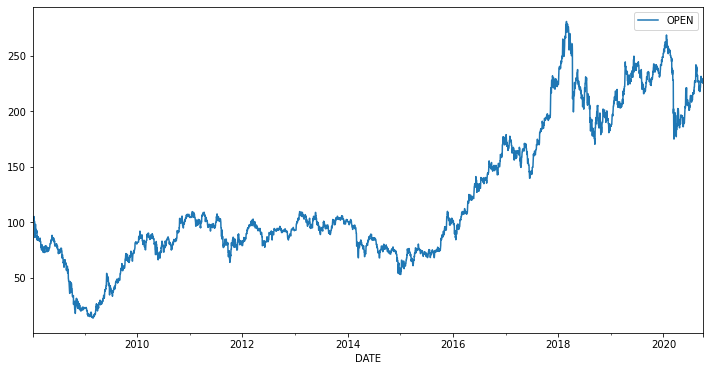

In [14]:
dtst.plot(figsize=(12,6))

### Данные с недельным интервалом

<AxesSubplot:xlabel='DATE'>

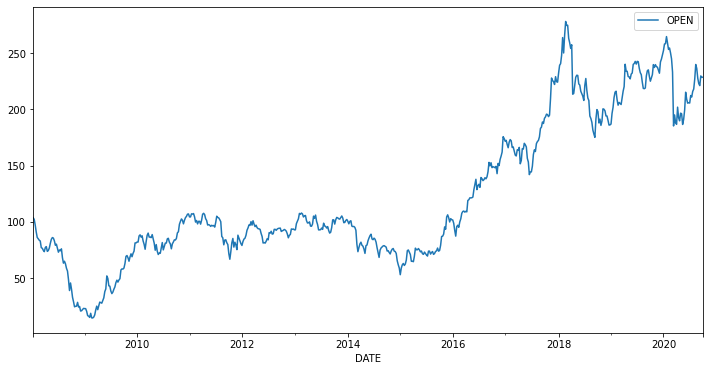

In [15]:
dtstw = dtst.resample('W').median()
dtstw.plot(figsize=(12,6))

In [16]:
dtstw

,OPEN
DATE,
2008-01-13,103.60
2008-01-20,102.20
2008-01-27,97.12
2008-02-03,91.00
2008-02-10,86.10
...,...
2020-09-06,222.80
2020-09-13,220.99
2020-09-20,229.59


In [17]:
dtstw.to_csv('week_qSBER.csv', sep=';')

### Гистограмма с полными данными

,OPEN
count,4648.000000
mean,121.612463
std,63.536809
min,13.800000
25%,78.380000
50%,97.115000
75%,172.582500
max,280.820000


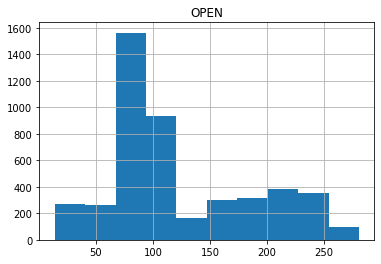

In [18]:
idtst = dtst.describe()
dtst.hist()
idtst

### Гистограмма с недельным интервалом

,OPEN
count,665.000000
mean,121.785233
std,63.623467
min,14.620000
25%,78.380000
50%,97.120000
75%,172.410000
max,277.960000


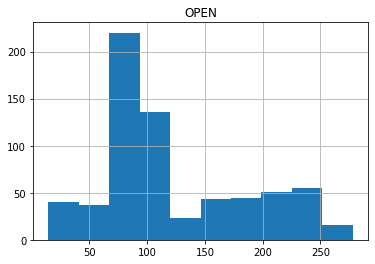

In [19]:
idtstw = dtstw.describe()
dtstw.hist()
idtstw

# Расчет коэффициента вариации

### Полные данные

In [20]:
V = idtst.loc['std']/idtst.loc['mean']

In [21]:
V

OPEN    0.522453
dtype: float64

### Недельные данные

In [22]:
Vw = idtstw.loc['std']/idtstw.loc['mean']

In [23]:
Vw

OPEN    0.522423
dtype: float64

# Тест Харки-Бера

### Полные данные

In [24]:
row =  [u'JB', u'p-value', u'skew', u'kurtosis']
jb_test = sm.stats.stattools.jarque_bera(dtst, axis=1)
jb_test

(array([0.375, 0.375, 0.375, ..., 0.375, 0.375, 0.375]),
 array([0.82902912, 0.82902912, 0.82902912, ..., 0.82902912, 0.82902912,
        0.82902912]),
 array([0., 0., 0., ..., 0., 0., 0.]),
 array([0., 0., 0., ..., 0., 0., 0.]))

In [25]:
a = np.vstack([jb_test])
a

array([[0.375     , 0.375     , 0.375     , ..., 0.375     , 0.375     ,
        0.375     ],
       [0.82902912, 0.82902912, 0.82902912, ..., 0.82902912, 0.82902912,
        0.82902912],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [26]:
idtst = SimpleTable(a, row)
idtst

JB,p-value,skew,kurtosis
0.375,0.375,0.375,0.375
0.8290291181804004,0.8290291181804004,0.8290291181804004,0.8290291181804004
0.0,0.0,0.0,0.0
0.0,0.0,0.0,0.0


### Недельные данные


In [27]:
roww =  [u'JB', u'p-value', u'skew', u'kurtosis']
jb_testw = sm.stats.stattools.jarque_bera(dtstw, axis=1)
jb_testw

(array([0.375, 0.375, 0.375, 0.375, 0.375, 0.375, 0.375, 0.375, 0.375,
        0.375, 0.375, 0.375, 0.375, 0.375, 0.375, 0.375, 0.375, 0.375,
        0.375, 0.375, 0.375, 0.375, 0.375, 0.375, 0.375, 0.375, 0.375,
        0.375, 0.375, 0.375, 0.375, 0.375, 0.375, 0.375, 0.375, 0.375,
        0.375, 0.375, 0.375, 0.375, 0.375, 0.375, 0.375, 0.375, 0.375,
        0.375, 0.375, 0.375, 0.375, 0.375, 0.375, 0.375, 0.375, 0.375,
        0.375, 0.375, 0.375, 0.375, 0.375, 0.375, 0.375, 0.375, 0.375,
        0.375, 0.375, 0.375, 0.375, 0.375, 0.375, 0.375, 0.375, 0.375,
        0.375, 0.375, 0.375, 0.375, 0.375, 0.375, 0.375, 0.375, 0.375,
        0.375, 0.375, 0.375, 0.375, 0.375, 0.375, 0.375, 0.375, 0.375,
        0.375, 0.375, 0.375, 0.375, 0.375, 0.375, 0.375, 0.375, 0.375,
        0.375, 0.375, 0.375, 0.375, 0.375, 0.375, 0.375, 0.375, 0.375,
        0.375, 0.375, 0.375, 0.375, 0.375, 0.375, 0.375, 0.375, 0.375,
        0.375, 0.375, 0.375, 0.375, 0.375, 0.375, 0.375, 0.375, 0.375,
      

In [28]:
aw = np.vstack([jb_testw])
aw

array([[0.375     , 0.375     , 0.375     , ..., 0.375     , 0.375     ,
        0.375     ],
       [0.82902912, 0.82902912, 0.82902912, ..., 0.82902912, 0.82902912,
        0.82902912],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [29]:
idtstw = SimpleTable(aw, roww)
idtstw

JB,p-value,skew,kurtosis
0.375,0.375,0.375,0.375
0.8290291181804004,0.8290291181804004,0.8290291181804004,0.8290291181804004
0.0,0.0,0.0,0.0
0.0,0.0,0.0,0.0


### Тест Дикки-Фуллера

### Полные данные

In [30]:
dtst2 = dtst.dropna(how='any')

In [31]:
dtst2

,OPEN
DATE,
2008-01-10,102.07
2008-01-11,103.60
2008-01-12,103.60
2008-01-13,103.60
2008-01-14,104.28
...,...
2020-09-26,228.26
2020-09-27,228.26
2020-09-28,228.79


In [32]:
test = sm.tsa.adfuller(dtst2)

In [33]:
test_result = [{'adf: ': test[0], 'p-value: ': test[1], 'Critical values: ': test[4]}]
test_result = pd.DataFrame(test_result)
if test[0] > test[4]['5%']:
    test_result[3] = 'есть единичные корни, ряд не стационарен'
else: 
    test_result[3] = 'единичных корней нет, ряд стационарен'

In [34]:
test_result

,adf:,p-value:,Critical values:,3
0,-0.633971,0.86312,"{'1%': -3.431764382259551, '5%': -2.8621649928...","есть единичные корни, ряд не стационарен"


### Недельные данные

In [35]:
dtst2w = dtstw.dropna(how='any')

In [36]:
dtst2w

,OPEN
DATE,
2008-01-13,103.60
2008-01-20,102.20
2008-01-27,97.12
2008-02-03,91.00
2008-02-10,86.10
...,...
2020-09-06,222.80
2020-09-13,220.99
2020-09-20,229.59


In [37]:
testw = sm.tsa.adfuller(dtst2w)

In [38]:
test_resultw = [{'adf: ': test[0], 'p-value: ': testw[1], 'Critical values: ': test[4]}]
test_resultw = pd.DataFrame(test_resultw)
if testw[0] > testw[4]['5%']:
    test_resultw[3] = 'есть единичные корни, ряд не стационарен'
else: 
    test_resultw[3] = 'единичных корней нет, ряд стационарен'

In [39]:
test_resultw

,adf:,p-value:,Critical values:,3
0,-0.633971,0.872964,"{'1%': -3.431764382259551, '5%': -2.8621649928...","есть единичные корни, ряд не стационарен"


### Проверка порядка интегрированного ряда

### Полные данные

In [40]:
dtst2diff = dtst.diff(periods=1).dropna()

In [41]:
test2 = sm.tsa.adfuller(dtst2diff)

In [42]:
test_result2 = [{'adf: ': test2[0], 'p-value: ': test2[1], 'Critical values: ': test2[4]}]
test_result2 = pd.DataFrame(test_result2)
if test2[0] > test2[4]['5%']:
    test_result2[3] = 'есть единичные корни, ряд не стационарен'
else: 
    test_result2[3] = 'единичных корней нет, ряд стационарен'

In [43]:
test_result2

,adf:,p-value:,Critical values:,3
0,-15.054429,9.193896e-28,"{'1%': -3.431764382259551, '5%': -2.8621649928...","единичных корней нет, ряд стационарен"


### Недельные данные

In [44]:
dtst2diffw = dtstw.diff(periods=1).dropna()

In [45]:
test2w = sm.tsa.adfuller(dtst2diffw)

In [46]:
test_result2w = [{'adf: ': test2w[0], 'p-value: ': test2w[1], 'Critical values: ': test2w[4]}]
test_result2w = pd.DataFrame(test_result2w)
if test2w[0] > test2w[4]['5%']:
    test_result2w[3] = 'есть единичные корни, ряд не стационарен'
else: 
    test_result2w[3] = 'единичных корней нет, ряд стационарен'

In [47]:
test_result2w

,adf:,p-value:,Critical values:,3
0,-7.560559,3.018003e-11,"{'1%': -3.440419374623044, '5%': -2.8659830798...","единичных корней нет, ряд стационарен"


### Проверка мат ожидания

In [48]:
#dt2diff.index[len(dt2diff.index)/3]

In [49]:
#m = dt2diff.index[len(dt2diff.index)/2+1]

In [50]:
"""r1 = sm.stats.DescrStatsW(dt2diff[m:])
r2 = sm.stats.DescrStatsW(dt2diff[:m])
prov = sm.stats.CompareMeans(r1,r2).ttest_ind()[1]
prov"""

'r1 = sm.stats.DescrStatsW(dt2diff[m:])\nr2 = sm.stats.DescrStatsW(dt2diff[:m])\nprov = sm.stats.CompareMeans(r1,r2).ttest_ind()[1]\nprov'

### Полные данные

<AxesSubplot:xlabel='DATE'>

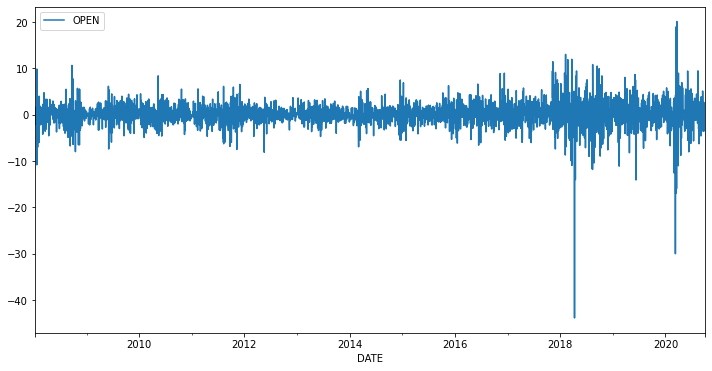

In [51]:
dtst2diff.plot(figsize=(12,6))

<Figure size 864x576 with 0 Axes>

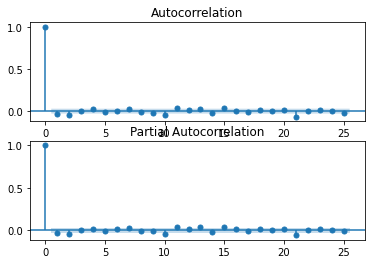

In [52]:
ig = plt.figure(figsize=(12,8))
fig = plt.figure() #добавил эту строку,так как без неё не запускается ячейка
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(dtst2diff.values.squeeze(), lags=25, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(dtst2diff, lags=25, ax=ax2)

### Недельные данные

<AxesSubplot:xlabel='DATE'>

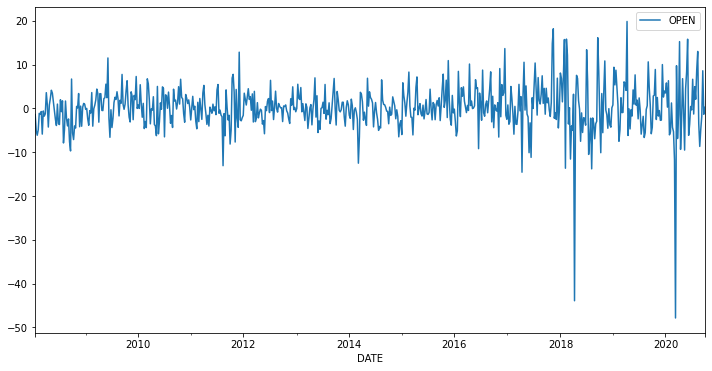

In [53]:
dtst2diffw.plot(figsize=(12,6))

<Figure size 864x576 with 0 Axes>

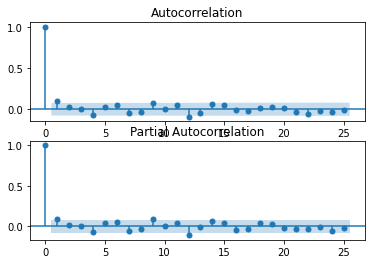

In [54]:
igw = plt.figure(figsize=(12,8))
fig = plt.figure() #добавил эту строку,так как без неё не запускается ячейка
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(dtst2diffw.values.squeeze(), lags=25, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(dtst2diffw, lags=25, ax=ax2)

После изучения коррелограммы PACF можно сделать вывод, что p = 1, т.к. на ней только 1 лаг сильно отличнен от нуля. По коррелограмме ACF можно увидеть, что q = 1, т.к. после лага 1 значении функций резко падают

### Построение ARIMA модели

### Недельные данные

In [55]:
src_data_modelw = dtstw['2020-01-01':'2020-09-29']
modelw =  sm.tsa.arima.ARIMA(src_data_modelw, order=(1,1,1), freq='W').fit()
# в методе fit() пришлось удалить все параметры, так как они не подходят 
#(нет в документации)

c:\projects\ds_lessons\env\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:965: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\projects\ds_lessons\env\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:977: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


In [56]:
modelw.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                   OPEN   No. Observations:                   39
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -142.937
Date:                Tue, 27 Oct 2020   AIC                            291.873
Time:                        19:18:15   BIC                            296.786
Sample:                    01-05-2020   HQIC                           293.621
                         - 09-27-2020                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5539      3.421      0.162      0.871      -6.152       7.260
ma.L1         -0.5186      3.504     -0.148      0.882      -7.387       6.349
sigma2       108.3145     14.745      7.346      0.000      79.415     137.214
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):               137.25
Prob(Q):                              0.97   Prob(JB):                         0.00
Heteroskedasticity (H):               0.19   Skew:                            -2.10
Prob(H) (two-sided):                  0.00   Kurtosis:                        11.31
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

### Полные данные (модель не строится)

In [57]:
src_data_model = dtst['2014-01-01':'2020-09-30']
model =  sm.tsa.arima.ARIMA(src_data_model, order=(1,1,1), freq='D').fit()
# в методе fit() пришлось удалить все параметры, так как они не подходят 
#(нет в документации)

c:\projects\ds_lessons\env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


In [58]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                   OPEN   No. Observations:                 2465
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -5994.277
Date:                Tue, 27 Oct 2020   AIC                          11994.555
Time:                        19:18:15   BIC                          12011.984
Sample:                    01-01-2014   HQIC                         12000.887
                         - 09-30-2020                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5253      0.241      2.182      0.029       0.053       0.997
ma.L1         -0.5551      0.234     -2.377      0.017      -1.013      -0.097
sigma2         7.5960      0.052    145.578      0.000       7.494       7.698
===================================================================================
Ljung-Box (L1) (Q):                   0.32   Jarque-Bera (JB):            144565.10
Prob(Q):                              0.57   Prob(JB):                         0.00
Heteroskedasticity (H):               4.72   Skew:                            -2.15
Prob(H) (two-sided):                  0.00   Kurtosis:                        40.28
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

### Q-тест Льюинга-Бокса

In [59]:
type(model.resid)

pandas.core.series.Series

In [60]:
q_test = sm.tsa.stattools.acf(model.resid, qstat=True)

c:\projects\ds_lessons\env\lib\site-packages\statsmodels\tsa\stattools.py:652: FutureWarning: The default number of lags is changing from 40 tomin(int(10 * np.log10(nobs)), nobs - 1) after 0.12is released. Set the number of lags to an integer to  silence this warning.
  warnings.warn(
c:\projects\ds_lessons\env\lib\site-packages\statsmodels\tsa\stattools.py:662: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


In [61]:
q_test

(array([ 1.00000000e+00,  7.22700162e-03, -2.39035018e-02,  7.78046494e-03,
         1.72080213e-02, -1.01782765e-02,  3.71897011e-03,  1.76420597e-02,
        -3.76911694e-03, -2.27657076e-02, -4.00170410e-02,  3.01713807e-02,
         1.77054956e-02,  2.18258090e-02, -1.61817987e-02,  2.81084112e-02,
         1.22685236e-03, -1.12921909e-02,  1.40821524e-02, -5.10505615e-05,
         1.33184627e-02, -5.32799176e-02,  5.38967321e-03,  7.35520598e-03,
         7.63693708e-03, -1.43471486e-02,  1.36071109e-02, -2.17277924e-02,
        -5.25935256e-03, -4.06967251e-04, -2.31589395e-02, -2.79414009e-02,
        -7.11108907e-03,  1.90642229e-02,  7.95956328e-03, -9.15043979e-03,
        -1.97097305e-03,  3.36148146e-03, -1.00018508e-03, -1.05592161e-02,
         2.32499313e-02]),
 array([ 0.1289026 ,  1.53963525,  1.68915863,  2.42086415,  2.67695818,
         2.71116186,  3.48118322,  3.51634413,  4.79961997,  8.76627581,
        11.02208252, 11.79923225, 12.98065767, 13.63033296, 15.5914

In [62]:
pd.DataFrame({'Q-stat':q_test[1], 'p-value':q_test[2]})

,Q-stat,p-value
0,0.128903,0.719573
1,1.539635,0.463098
2,1.689159,0.639347
3,2.420864,0.658860
4,2.676958,0.749640
5,2.711162,0.844127
6,3.481183,0.837214
7,3.516344,0.897917
8,4.799620,0.851414
9,8.766276,0.554419


### Рассчет коэффициента детерминации

In [63]:
pred = model.predict('2020-09-30','2020-10-15', typ='levels')

In [74]:
trn = dtst['2020-09-15':]

In [75]:
trn.shape

(16, 1)

In [76]:
pred.shape

(16, 1)

In [77]:
pred

,OPEN
2020-09-30,228.500083
2020-10-01,225.395627
2020-10-02,225.445856
2020-10-03,225.472239
2020-10-04,225.486097
2020-10-05,225.493376
2020-10-06,225.497200
2020-10-07,225.499208
2020-10-08,225.500263
2020-10-09,225.500817


In [78]:
pred = pred.to_frame()


AttributeError: 'DataFrame' object has no attribute 'to_frame'

In [79]:
pred.shape

(16, 1)

In [80]:
pred

,OPEN
2020-09-30,228.500083
2020-10-01,225.395627
2020-10-02,225.445856
2020-10-03,225.472239
2020-10-04,225.486097
2020-10-05,225.493376
2020-10-06,225.497200
2020-10-07,225.499208
2020-10-08,225.500263
2020-10-09,225.500817


In [81]:
pred.rename(columns={'predicted_mean': 'OPEN'}, inplace=True)

In [82]:
trn

,OPEN
DATE,
2020-09-15,227.44
2020-09-16,231.17
2020-09-17,231.21
2020-09-18,231.36
2020-09-19,229.59
2020-09-20,229.59
2020-09-21,229.88
2020-09-22,226.27
2020-09-23,228.94


In [83]:
r2 = r2_score(trn, pred)

In [84]:
r2

-4.114231517608867

In [85]:
metrics.rmse(trn,pred)

3.6818609020843276

In [86]:
metrics.mae(trn,pred)

3.288394827822305

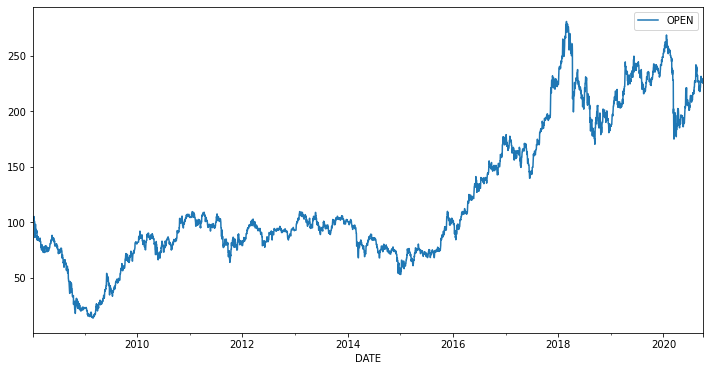

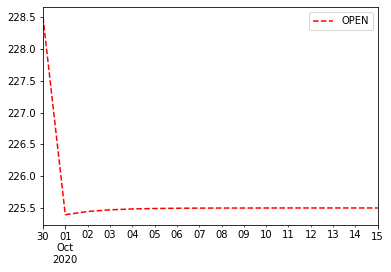

In [87]:
dtst.plot(figsize=(12,6))
pred.plot(style='r--')
plt.show()

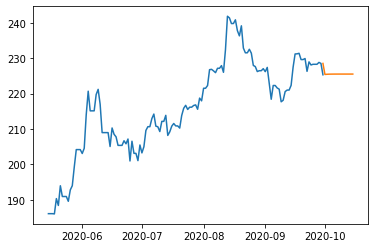

In [88]:
plt.plot(dtst['2020-05-15':])
plt.plot(pred)
plt.show()